In [1]:
import sys
sys.path.append('./')

from inference import Inference
import cv2
from matplotlib import pyplot as plt

ImportError: Traceback (most recent call last):
  File "/home/pedropva/.local/share/virtualenvs/minicurso_2019-g0_BL0gn/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/home/pedropva/.local/share/virtualenvs/minicurso_2019-g0_BL0gn/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/home/pedropva/.local/share/virtualenvs/minicurso_2019-g0_BL0gn/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/home/pedropva/.local/share/virtualenvs/minicurso_2019-g0_BL0gn/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/home/pedropva/.local/share/virtualenvs/minicurso_2019-g0_BL0gn/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: libcublas.so.10.0: cannot open shared object file: No such file or directory


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [ ]:
def tensorflow_shutup():
    """
    Make Tensorflow less verbose
    """
    try:
        # noinspection PyPackageRequirements
        import os
        from tensorflow import logging
        logging.set_verbosity(logging.ERROR)
        os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

        # Monkey patching deprecation utils to shut it up! Maybe good idea to disable this once after upgrade
        # noinspection PyUnusedLocal
        def deprecated(date, instructions, warn_once=True):
            def deprecated_wrapper(func):
                return func
            return deprecated_wrapper

        from tensorflow.python.util import deprecation
        deprecation.deprecated = deprecated

    except ImportError:
        pass

tensorflow_shutup()

## Definindo o caminho para o arquivo original

In [2]:
img_full_name = '0.jpg'
img_dir = './images/'
save_dir = './out/'
img_name, extension = img_full_name.split('.')
extension = '.' + extension

## Instanciando um objeto da classe Inference 
## Essa classe constroi o grafo de execução dos modelos Stacked Hourglass e YOLO
## Também carrega os pesos treinados desses modelos.

In [ ]:
inf = Inference(config_file = 'config_tiny.cfg', model = 'hg_refined_tiny_200', yoloModel = 'YOLO_small.ckpt')

## Carregando uma imagem RGB 

In [5]:
img = cv2.imread(img_dir+img_full_name)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

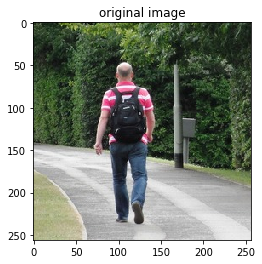

In [12]:
plt.imshow(img)
plt.title('Imagem original')
plt.show()

## Caso a imagem não seja do tamanho 256x256, redimensionar.

In [ ]:
if img.shape != (256,256,3):
    print('Wrong shape. Resizing.')
    img = cv2.resize(img, (256,256))

## Mostrando as dimensões
## Deve ser (256X256X3) == (alturaXlarguraXnumero_de_canais_de_cor)

In [ ]:
print('Img shape: ',img.shape)

## Chamando a função que prediz a pose, onde os parametros são:
### thresh : limiar de corte para o nivel de confiança para o keypoint
### pltJ : plotar keypoints (ou Joints)
### pltL : plotar segmentos (ou Limbs)


In [ ]:
new_img = inf.pltSkeleton(img, thresh = 0.5, pltJ = True, pltL = True)

In [ ]:
plt.imshow(img)
plt.title('Imagem + esqueleto')
plt.show()

In [ ]:
new_img = cv2.cvtColor(new_img, cv2.COLOR_RGB2BGR)

In [ ]:
plt.imshow(img)
plt.title('Imagem + esqueleto')
plt.show()

## Nessa função a predição para na fase de detecção de pessoas

In [ ]:
bb = inf.pltBoundingBoxes(img)
bb = cv2.cvtColor(bb, cv2.COLOR_RGB2BGR)

In [ ]:
plt.imshow(img)
plt.title('Bounding box')
plt.show()

## Nessa função a predição para quando temos os heatmaps, a função retorna eles

In [ ]:
hm = inf.predictHM(img)
hm = cv2.cvtColor(hm, cv2.COLOR_RGB2BGR)

In [ ]:
plt.imshow(img)
plt.title('Heatmap')
plt.show()